# Importing Libraries

In [1]:
import optuna
import pickle
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, confusion_matrix

from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px

# Loading Data

In [2]:
cancer_df = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Cancer.csv')
cancer_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


# Data Cleaning

In [3]:
cancer_df_cleaned = cancer_df.drop(columns=['id', 'Unnamed: 32'],axis=1)

cancer_df_cleaned['label'] = np.where(cancer_df_cleaned['diagnosis']=="M", 1, 0)

cancer_df_cleaned

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,label
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [4]:
target_col = 'label'
feature_cols = [col for col in cancer_df_cleaned.columns if col not in [target_col, 'diagnosis']]

print("Target column: ", target_col)
print("Feature columns: ", feature_cols)

Target column:  label
Feature columns:  ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


# Selecting Features

Selected Feature: ['concave points_worst' 'perimeter_worst' 'concave points_mean'
 'radius_worst' 'perimeter_mean' 'area_worst' 'radius_mean' 'area_mean'
 'concavity_mean' 'concavity_worst' 'compactness_mean' 'compactness_worst'
 'radius_se' 'perimeter_se' 'area_se' 'texture_worst' 'smoothness_worst'
 'symmetry_worst' 'texture_mean' 'concave points_se']


<Axes: ylabel='features'>

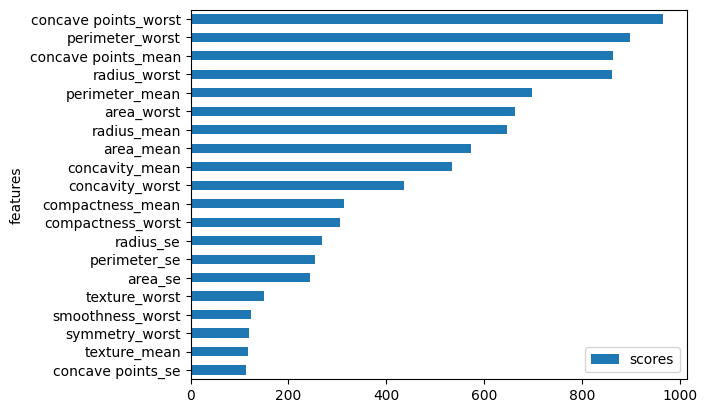

In [5]:
def select_k_best(X, Y , top_k:int = 20):
    model = SelectKBest(score_func=f_classif, k=top_k)  
    model.fit(X, Y)
    scores = model.scores_
    col_names = X.columns

    score_df = pd.DataFrame({'features':col_names,'scores':scores}).sort_values(by='scores',ascending=False).reset_index(drop=True).round(3)
    selected_feature = score_df.head(top_k)['features'].values
    return selected_feature, score_df.head(top_k)

selected_feature, top_k_df= select_k_best(cancer_df_cleaned[feature_cols], cancer_df_cleaned[target_col],top_k=20)

print("Selected Feature:",selected_feature)
top_k_df.sort_values(by='scores',ascending=True).plot.barh(y='scores',x='features')

# Data Splitting

# Split into train, validate and test

In [6]:
train_validate_df, test_df = train_test_split(cancer_df_cleaned, test_size=0.15, random_state=42)

X_test = test_df[selected_feature]
y_test = test_df[target_col]

print('X test shape:', X_test.shape)
print('y test shape:', y_test.shape)

X test shape: (86, 20)
y test shape: (86,)


In [7]:
X = train_validate_df[selected_feature]  # Features
y = train_validate_df[target_col]  # Target digits

X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.2, random_state=42)

print('X train shape:', X_train.shape)
print('y train shape:', y_train.shape)

print('X validate shape:', X_validate.shape)
print('y validate shape:', y_validate.shape)

X train shape: (386, 20)
y train shape: (386,)
X validate shape: (97, 20)
y validate shape: (97,)


# Training the model

## Extra Trees

In [8]:
model_config = {
    'n_estimators': 300,
    'max_depth': 20,
    'criterion': 'gini',  # Alternative: 'entropy'
    'random_state': 42,
    'bootstrap':True
}

# Initialize the model with the specified configuration
model = ExtraTreesClassifier(**{**model_config})

# Fit the model
model.fit(X_train, y_train)
model_name = 'et'
model

ExtraTreesClassifier(bootstrap=True, max_depth=20, n_estimators=300,
                     random_state=42)

In [9]:
print(f"Using {len(selected_feature)} features")
y_pred_val = model.predict(X_validate[selected_feature])

print(confusion_matrix(y_validate,y_pred_val))
print(classification_report(y_validate,y_pred_val))
precision = precision_score(y_validate,y_pred_val)
recall = recall_score(y_validate,y_pred_val)
f1 = f1_score(y_validate,y_pred_val)
print('precision_score:', precision)
print('recall_score:', recall)
print('f1_score:', f1)

Using 20 features
[[65  0]
 [ 5 27]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        65
           1       1.00      0.84      0.92        32

    accuracy                           0.95        97
   macro avg       0.96      0.92      0.94        97
weighted avg       0.95      0.95      0.95        97

precision_score: 1.0
recall_score: 0.84375
f1_score: 0.9152542372881356


## Precision, Recall, Probability

In [10]:
y_proba = model.predict_proba(X_validate[selected_feature])[:, 1]
precision_curve, recall_curve, thresholds = precision_recall_curve(y_validate, y_proba)
f1_curve = 2 * (precision_curve * recall_curve) / (precision_curve + recall_curve)
thresholds = np.append(thresholds, 1)

trace_precision = go.Scatter(x=thresholds, y=precision_curve, mode='lines+markers', name='Precision')
trace_recall = go.Scatter(x=thresholds, y=recall_curve, mode='lines+markers', name='Recall')
trace_f1score = go.Scatter(x=thresholds, y=f1_curve, mode='lines+markers', name='F1-Score')
trace_threshold = go.Scatter(x=thresholds, y=thresholds, mode='lines', name='Threshold', line=dict(dash='dash'))
layout = go.Layout(
  title='Precision, Recall, and Probability Threshold',
  xaxis=dict(title='Probability Threshold'),
  yaxis=dict(title='Score'),
  yaxis2=dict(title='Threshold', overlaying='y', side='right'),
  width=800,
  height=600,
  legend=dict(
    x=1.05,
    y=1,
    traceorder='normal',
    font=dict(size=12),
    bordercolor='Black',
    borderwidth=1
  ),
  hovermode='x unified'
)

fig = go.Figure(data=[trace_precision, trace_recall, trace_f1score, trace_threshold], layout=layout)
fig.show()

## AUC ROC Curve

In [11]:
y_proba_train = model.predict_proba(X_train[selected_feature])[:, 1]
fpr_train, tpr_train, thresholds_roc_train = roc_curve(y_train, y_proba_train)
roc_auc_train = roc_auc_score(y_train, y_proba_train)
train_trace_roc = go.Scatter(x=fpr_train, y=tpr_train, mode='lines', name=f'ROC Curve (Train AUC = {roc_auc_train:.2f})')

# Calculate ROC Curve (Validate)
y_proba_val = model.predict_proba(X_validate[selected_feature])[:, 1]
fpr_val, tpr_val, thresholds_roc_val = roc_curve(y_validate, y_proba_val)
roc_auc_val = roc_auc_score(y_validate, y_proba_val)
val_trace_roc = go.Scatter(x=fpr_val, y=tpr_val, mode='lines', name=f'ROC Curve (Validate AUC = {roc_auc_val:.2f})')

trace_diag = go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random Guess', line=dict(dash='dash'))

# Layout
layout_roc = go.Layout(
    title='AUC ROC Curve',
    xaxis=dict(title='False Positive Rate'),
    yaxis=dict(title='True Positive Rate'),
    width=800,
    height=600,
    legend=dict(
        x=1.05,
        y=1,
        traceorder='normal',
        font=dict(size=12),
        bordercolor='Black',
        borderwidth=1
    ),
)
fig_roc = go.Figure(data=[train_trace_roc, val_trace_roc, trace_diag], layout=layout_roc) 
fig_roc.show()

# Tuning the model

## Probability Threshold 

In [12]:
# Tune probability threshold (Selected based of Precision/Recall vs Prob Thres sweep)
probability_threshold = 0.4

# Evaluation using validation set
print("Validation Set:")
y_score_val = model.predict_proba(X_validate[selected_feature])
y_pred_val = y_score_val[:,1] > probability_threshold
print(confusion_matrix(y_validate,y_pred_val))
print(classification_report(y_validate,y_pred_val))
precision = precision_score(y_validate,y_pred_val)
recall = recall_score(y_validate,y_pred_val)
f1 = f1_score(y_validate,y_pred_val)
print('precision_score:', precision)
print('recall_score:', recall)
print('f1_score:', recall)

# Evaluation using test set
print("Test Set:")
y_score = model.predict_proba(X_test[selected_feature])
y_pred = y_score[:,1] > probability_threshold
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
precision_test = precision_score(y_test,y_pred)
recall_test = recall_score(y_test,y_pred)
f1_test = f1_score(y_test,y_pred)
print('precision_score:', precision_test)
print('recall_score:', recall_test)
print('f1_score:', f1_test)

Validation Set:
[[65  0]
 [ 3 29]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        65
           1       1.00      0.91      0.95        32

    accuracy                           0.97        97
   macro avg       0.98      0.95      0.96        97
weighted avg       0.97      0.97      0.97        97

precision_score: 1.0
recall_score: 0.90625
f1_score: 0.90625
Test Set:
[[53  1]
 [ 2 30]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        54
           1       0.97      0.94      0.95        32

    accuracy                           0.97        86
   macro avg       0.97      0.96      0.96        86
weighted avg       0.97      0.97      0.96        86

precision_score: 0.967741935483871
recall_score: 0.9375
f1_score: 0.9523809523809523


## Optuna Tuning

In [13]:
precision_scorer = make_scorer(precision_score, average='macro')

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 500)
    max_depth = trial.suggest_int('max_depth', 10, 30)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 4)
    bootstrap = trial.suggest_categorical('bootstrap', [True, False])

    model = ExtraTreesClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        bootstrap=bootstrap,
        random_state=42,
    )

    score = cross_val_score(model, X_train, y_train, cv=5, scoring=precision_scorer).mean()

    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

[I 2025-04-01 09:33:54,845] A new study created in memory with name: no-name-5d520dc2-c165-4537-8480-dc802b6bf3cc
[I 2025-04-01 09:33:55,714] Trial 0 finished with value: 0.9609316072514027 and parameters: {'n_estimators': 343, 'max_depth': 24, 'min_samples_split': 7, 'min_samples_leaf': 1, 'bootstrap': True}. Best is trial 0 with value: 0.9609316072514027.
[I 2025-04-01 09:33:56,648] Trial 1 finished with value: 0.9600387677165794 and parameters: {'n_estimators': 500, 'max_depth': 28, 'min_samples_split': 7, 'min_samples_leaf': 3, 'bootstrap': False}. Best is trial 0 with value: 0.9609316072514027.
[I 2025-04-01 09:33:57,250] Trial 2 finished with value: 0.9600387677165794 and parameters: {'n_estimators': 310, 'max_depth': 21, 'min_samples_split': 2, 'min_samples_leaf': 3, 'bootstrap': False}. Best is trial 0 with value: 0.9609316072514027.
[I 2025-04-01 09:33:57,526] Trial 3 finished with value: 0.9539204528554717 and parameters: {'n_estimators': 101, 'max_depth': 29, 'min_samples_sp

# PCA visualisation

In [23]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cancer_df_cleaned[selected_feature])

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

fig = px.scatter(
    x = X_pca[:, 0], # First principal component
    y = X_pca[:, 1], # Second principal component
    color = cancer_df_cleaned[target_col].astype(str), 
    title=f'PCA 2D Projection for Actual Fails',
    color_discrete_map={'0': 'red', '1': 'blue'}
)

loadings = pca.components_.T 

pca_loading_fig = px.scatter(
    x = X_pca[:, 0], # First principal component
    y = X_pca[:, 1], # Second principal component
    color = cancer_df_cleaned[target_col].astype(str), 
)
for i, feature in enumerate(selected_feature):
    x_end = loadings[i, 0] * 25
    y_end = loadings[i, 1] * 25

    pca_loading_fig.add_trace(go.Scatter(
        x=[0, x_end],
        y=[0, y_end],
        mode='lines+text',
        line=dict(color=f'rgba({(i * 50) % 255}, {(i * 100) % 255}, {(i * 150) % 255}, 1)', width=2),
        name=feature,
        text=["", feature],  # Show label only at the end
        textposition="top right",  # Can be 'top left', 'middle right', etc.
        textfont=dict(size=10)
    ))


pca_loading_fig.update_layout(
    title=f'PCA Loading Plot for Actual Fails',
    xaxis_title='Principal Component 1',
    yaxis_title='Principal Component 2'
)

pca_loading_fig.show()
fig.show()

fig = px.scatter(x = X_pca[:, 0], y = X_pca[:, 1], color=model.predict_proba(cancer_df_cleaned[selected_feature])[:,1], title=f'PCA 2D Projection for Predict Prob')
fig.show()

# Saving the model

In [15]:
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Testing model

In [16]:
with open('model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Use it like normal
y_pred = loaded_model.predict(X_test[selected_feature])
